In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  
import calendar
import argparse
import glob
import geopandas
from geodatasets import get_path

In [2]:
output_col_names = ['lon'
,'lat'
,'variable'
,'ipft'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']

input_col_names = ["lon", 'lat','var' ,'Area', 'year', 'sum', 'max', 'average'
         , 'min', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'
         , 'Nov', 'Dec', 'Area_Name']

In [3]:
read_in_data = pd.read_csv('/home/smmrrr/TEM_Analysis/TEM_Analysis/Aggregate_TEM/all_parallel_variable_info.csv')

In [4]:
read_in_data

,input_group,NIRR,PAR,PREC,TAIR,VPR,WS10,output_paths,output_group,output_var
0,0,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,0,NPP
1,0,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,0,FCO2
2,0,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,0,SOILORGC
3,0,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,0,TEMP
4,0,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,0,FRDL
...,...,...,...,...,...,...,...,...,...,...
4995,9954,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,9954,FH2O
4996,9954,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,9954,SOILORGC
4997,9954,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,9954,NPP
4998,9954,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_sup...,9954,VEGINGPP


In [5]:
forest_vegs = [4, 5, 6, 8, 9, 10, 11, 16, 17, 18, 19, 20, 25, 33]
forest_types = ["Boreal Forest", "Forested Boreal Wetlands", "Boreal Woodlands","Mixed Temperate Forests", 
               "Temperate Coniferous Forests", "Temperate Deciduous Forests", "Temperate Forested Wetlands", 
               "Tropical Evergreen Forests", "Tropical Forested Wetlands", "Tropical Deciduous Forests", "Xeromorphic Forests and Woodlands"
               ,"Tropical Forested Floodplains", "Temperate Forested Floodplains", "Temperate Broadleaved Evergreen Forests"]

forest_pfts = pd.DataFrame({
'current_veg':forest_vegs, 
    'forest_type':forest_types
})


In [7]:
####get npp
npp_files = read_in_data.loc[read_in_data['output_var']=='NPP'].reset_index()

i = 0 
# for i in range(2):
for i in range(len(npp_files)):
###read in cohort output
    cohort_output = pd.read_csv(npp_files.loc[i, 'output_paths']
                , names = output_col_names)

    # print('cohort rows read in : '+ str(len(cohort_output)))    
    cohort_output=cohort_output[['lon', 'lat','year','ipft', 'cohort_area','potential_veg' ,'current_veg', 'annual_sum' ,'monthly_maximum' ,'monthly_mean' ,'monthly_minimum' ]].reset_index()

    #### match pfts to the current veg, bin by standage for forests
    conditions = [
     cohort_output['current_veg'].isin([50, 49, 52, 53, 54, 55, 56]) 
        ,cohort_output['current_veg'].isin([51, 47])
    , cohort_output['current_veg'].isin([48, 46]) 
        ,cohort_output['current_veg'].isin([4, 5, 6, 8, 9, 
                                            10, 11, 16, 17, 18, 19, 20, 25, 33])
        ,cohort_output['current_veg'].isin([7, 12, 13, 14, 22, 23, 24, 25, 26, 27, 28, 30, 31])
        ,cohort_output['current_veg'].isin([15, 35, 29])
        ,cohort_output['current_veg'].isin([2, 3])
        ,cohort_output['current_veg'].isin([21])
    ]

    values = [
              'crop', 
              'pasture', 
              'urban or suburban', 
              'forest', 
              'grass', 
              'shrub', 
              'tundra',
                'desert']
    cohort_output['pft'] = np.select(conditions, values, default = 'other')

    cohort_output=cohort_output.merge(forest_pfts, on = 'current_veg', how = 'left')
    
    cohort_output.to_csv('/home/smmrrr/TEM_output_processed/Aggregate_TEM/'+npp_files.loc[i, 'output_var']+str(npp_files.loc[i, 'output_group'])+'.csv'
                        ,index = False)
    cohort_output = cohort_output.loc[cohort_output['current_veg'].isin(forest_vegs)]
    # print('forest only cohorts : '+ str(len(cohort_output)))    

    if (i == 0):
        all_npp = cohort_output
    else:
        all_npp = pd.concat([all_npp, cohort_output], axis = 0)

    print(i)

    # intervals_standage = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 3000]
    # cohort_output['stand_age_bin'] = pd.cut(
    #     cohort_output['stand_age'], bins=intervals_standage)
    # # print(annual_current_veg[['pft', 'stand_age_bin']].value_counts())
    # cohort_output.loc[cohort_output['pft']!='forest', ['stand_age_bin']] =  cohort_output['stand_age_bin'].min()
    # cohort_output['stand_age_interval_min'] = cohort_output['stand_age_bin'].apply(lambda x: x.right).astype(int)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1]:
all_npp


NameError: name 'all_npp' is not defined

In [68]:
tt = all_npp.groupby(['lon','lat','year'])['potential_veg'].count().reset_index()


In [74]:
tt.loc[tt['potential_veg']>1,]


,lon,lat,year,potential_veg
139,-177.0,-44.0,1965,3
140,-177.0,-44.0,1966,3
141,-177.0,-44.0,1969,3
142,-177.0,-44.0,1970,3
143,-177.0,-44.0,1971,3
...,...,...,...,...
5831163,179.5,-16.5,1962,3
5831164,179.5,-16.5,1965,3
5831165,179.5,-16.5,1966,3
5831166,179.5,-16.5,1967,3


In [ ]:
all_npp

In [79]:
all_npp['temp_weight'] = all_npp['annual_sum'] * all_npp['cohort_area'] 


npp_sum = all_npp.groupby(
    ['lon','lat','year','pft','current_veg', 'forest_type']
)[['temp_weight', 'cohort_area']].sum()

# all_grids =  all_grids.reset_index()

npp_sum['value_weight'] = npp_sum['temp_weight']/npp_sum['cohort_area']
npp_sum = npp_sum.reset_index()
# print('cohort rows post cohort collapse : '+ str(len(annual_cohort_output)))
npp_sum

,lon,lat,year,pft,current_veg,forest_type,temp_weight,cohort_area,value_weight
0,-177.0,-44.0,1702,forest,33,Temperate Broadleaved Evergreen Forests,852885.0,990,861.50000
1,-177.0,-44.0,1703,forest,33,Temperate Broadleaved Evergreen Forests,766161.0,990,773.90000
2,-177.0,-44.0,1704,forest,33,Temperate Broadleaved Evergreen Forests,753588.0,990,761.20000
3,-177.0,-44.0,1705,forest,33,Temperate Broadleaved Evergreen Forests,813582.0,990,821.80000
4,-177.0,-44.0,1706,forest,33,Temperate Broadleaved Evergreen Forests,806652.0,990,814.80000
...,...,...,...,...,...,...,...,...,...
5831229,179.5,-16.5,1962,forest,16,Tropical Evergreen Forests,1455978.0,1250,1164.78240
5831230,179.5,-16.5,1965,forest,16,Tropical Evergreen Forests,1513970.4,1250,1211.17632
5831231,179.5,-16.5,1966,forest,16,Tropical Evergreen Forests,1536934.4,1250,1229.54752
5831232,179.5,-16.5,1967,forest,16,Tropical Evergreen Forests,1368643.3,1250,1094.91464


In [81]:
plot_npp_sum = npp_sum.loc[npp_sum['year'].between(1850, 2014)].groupby(['lon', 'lat', 'pft', 'forest_type'])['value_weight'].mean()



In [78]:
all_npp.loc[
(all_npp['lon']==-177.0)
    &(all_npp['lat']==-44)
    &(all_npp['year']==1965)
]

,index,lon,lat,year,ipft,cohort_area,potential_veg,current_veg,annual_sum,monthly_maximum,monthly_mean,monthly_minimum,pft,forest_type
17178,17178,-177.0,-44.0,1965,32,20,33,33,682.5,126.4,56.88,1.3,forest,Temperate Broadleaved Evergreen Forests
17179,17179,-177.0,-44.0,1965,49,82,33,33,38.1,23.8,3.17,-3.1,forest,Temperate Broadleaved Evergreen Forests
17180,17180,-177.0,-44.0,1965,50,888,33,33,53.5,12.9,4.46,-0.2,forest,Temperate Broadleaved Evergreen Forests


In [ ]:
land_cover

land_cover = geopandas.GeoDataFrame(
    land_cover, geometry=geopandas.points_from_xy(land_cover.lon, land_cover.lat)
    , crs="EPSG:4326"
)
land_cover



In [83]:
plot_npp_sum = plot_npp_sum.reset_index()
plot_npp_sum

,lon,lat,pft,forest_type,value_weight
0,-177.0,-44.0,forest,Temperate Broadleaved Evergreen Forests,297.966316
1,-176.5,-44.0,forest,Temperate Broadleaved Evergreen Forests,242.006804
2,-175.5,-21.5,forest,Tropical Evergreen Forests,208.196563
3,-166.5,64.5,forest,Boreal Forest,104.609697
4,-166.0,64.5,forest,Boreal Forest,91.337576
...,...,...,...,...,...
29261,179.0,-18.5,forest,Tropical Evergreen Forests,1040.380000
29262,179.0,-17.0,forest,Tropical Evergreen Forests,1167.320420
29263,179.0,-16.5,forest,Tropical Evergreen Forests,896.577876
29264,179.5,-17.0,forest,Tropical Evergreen Forests,1217.201577


In [107]:

plot_npp_sum = geopandas.GeoDataFrame(
    plot_npp_sum, geometry=geopandas.points_from_xy(plot_npp_sum.lon, plot_npp_sum.lat)
    , crs="EPSG:4326"
)
plot_npp_sum=plot_npp_sum.loc[~plot_npp_sum['forest_type'].str.contains(r'Wetland|Woodlands|Floodplain')]

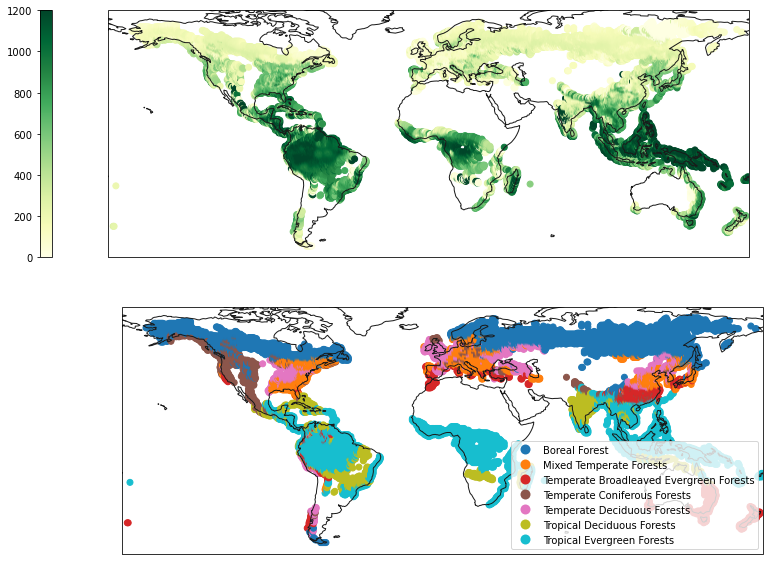

In [111]:
# sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = gpp)


ig, axs = plt.subplots(nrows=2, ncols=1,figsize = (20, 10)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs[0].coastlines(color="0.1")
axs[1].coastlines(color="0.1")


plot0 = plot_npp_sum.plot(ax = axs[0] 
                                         ,cmap = 'YlGn'
                                         , column = 'value_weight', legend = True, 
                                         vmin = 0, vmax = 1200,
                                        legend_kwds={ "location":"left" , "pad":0.05}
                                        )



plot1 = plot_npp_sum.plot(ax = axs[1] 
                                         ,cmap='tab10'
                                         , column = 'forest_type' , legend = True,
                                         # ,vmin = 0, vmax = 1,
                                        # legend_kwds={ "loc":"center right" }
                                        )

# axs[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')


In [5]:
i = 4

In [6]:
##read in precipitation files
prec = pd.read_csv(read_in_data.loc[i, 'PREC']
           , names = input_col_names)
par = pd.read_csv(read_in_data.loc[i, 'PAR']
           , names = input_col_names)
nirr = pd.read_csv(read_in_data.loc[i, 'NIRR']
           , names = input_col_names)
tair = pd.read_csv(read_in_data.loc[i, 'TAIR']
           , names = input_col_names)
vpr = pd.read_csv(read_in_data.loc[i, 'VPR']
           , names = input_col_names)
ws10 = pd.read_csv(read_in_data.loc[i, 'WS10']
           , names = input_col_names)


print('data read in')
## shape input datasets wide to long
prec = pd.melt(prec, id_vars = ['lon','lat', 'Area', 'year'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='prec'
        ,col_level=0)

par = pd.melt(par, id_vars = ['lon','lat', 'Area', 'year'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='par'
        ,col_level=0)

nirr = pd.melt(nirr, id_vars = ['lon','lat', 'Area', 'year'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='nirr'
        ,col_level=0)

tair = pd.melt(tair, id_vars = ['lon','lat', 'Area', 'year'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='tair'
        ,col_level=0)

vpr = pd.melt(vpr, id_vars = ['lon','lat', 'Area', 'year'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='vpr'
        ,col_level=0)

ws10 = pd.melt(ws10, id_vars = ['lon','lat', 'Area', 'year'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='ws10'
        ,col_level=0)

##merge climate variables together
climate_vars = prec.merge(
            par,on = ['lon','lat', 'Area', 'year', 'month']
            ).merge(
            tair ,on = ['lon','lat', 'Area', 'year', 'month']                           
            ).merge(
            nirr ,on = ['lon','lat', 'Area', 'year', 'month']                           
            ).merge(
            vpr ,on = ['lon','lat', 'Area', 'year', 'month']                           
            ).merge(
            ws10 ,on = ['lon','lat', 'Area', 'year', 'month']                           
            )



data read in


In [7]:
del prec, par, tair, nirr, vpr, ws10
##subset to forest veg types 
# cohort_output = cohort_output.loc[cohort_output['current_veg'].isin(forest_vegs)] 
print('clim processed')


clim processed


In [8]:
climate_vars
print('climate rows : '+ str(len(climate_vars)))

climate rows : 486864


In [37]:
###read in cohort output
cohort_output = pd.read_csv(read_in_data.loc[i, 'output_paths']
            , names = output_col_names)

print('cohort rows read in : '+ str(len(cohort_output)))

cohort rows read in : 41734


In [38]:
cohort_output.loc[1]

lon                 -180.0
lat                   65.0
variable             FRDL 
tt                       2
potential_veg            3
current_veg              3
subtype                  3
community_type           3
silt_clay            69.83
lc_state                 0
land_area             1040
cohort_area           1039
year                  1703
annual_sum            82.7
monthly_maximum       29.0
monthly_mean          6.89
monthly_minimum        0.1
Jan                   0.17
Feb                   0.38
Mar                   0.57
Apr                   0.66
May                   0.69
Jun                   0.67
Jul                  15.29
Aug                   29.0
Sep                  28.59
Oct                   6.38
Nov                   0.26
Dec                   0.07
region              Russia
Name: 1, dtype: object

In [10]:
###summary table of lat, lon, num years, num cohorts, 
summary_lon_lat = cohort_output.groupby(['lon', 'lat'])[['year']].nunique()
summary_lon_lat.to_csv('/home/smmrrr/TEM_output_processed/Aggregate_TEM/lon_lat_counts/'+read_in_data.loc[i, 'output_var']+str(read_in_data.loc[i, 'output_group'])+'.csv'
                        ,index = False)

In [20]:
##melt cohort output
cohort_output = pd.melt(cohort_output, id_vars = ['lon','lat', 'cohort_area', 'land_area', 'year','variable', 'current_veg', 'stand_age'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='value'
        ,col_level=0)

print('cohort rows wide to long : '+ str(len(cohort_output)))

cohort rows wide to long : 500808


In [21]:
cohort_output

,lon,lat,cohort_area,land_area,year,variable,current_veg,stand_age,month,value
0,-180.0,65.0,1702,1039,84.9,FRDL,3,3,Jan,0.38
1,-180.0,65.0,1703,1039,82.7,FRDL,3,3,Jan,0.38
2,-180.0,65.0,1704,1039,44.5,FRDL,3,3,Jan,0.37
3,-180.0,65.0,1705,1039,77.9,FRDL,3,3,Jan,0.38
4,-180.0,65.0,1706,1039,90.0,FRDL,3,3,Jan,0.39
...,...,...,...,...,...,...,...,...,...,...
500803,-171.5,66.0,2018,1245,22.9,FRDL,2,2,Dec,Russia
500804,-171.5,66.0,2019,1245,24.3,FRDL,2,2,Dec,Russia
500805,-171.5,66.0,2020,1245,26.8,FRDL,2,2,Dec,Russia
500806,-171.5,66.0,2021,1245,19.4,FRDL,2,2,Dec,Russia


In [22]:
#### match pfts to the current veg, bin by standage for forests
conditions = [
 cohort_output['current_veg'].isin([50, 49, 52, 53, 54, 55, 56]) 
    ,cohort_output['current_veg'].isin([51, 47])
, cohort_output['current_veg'].isin([48, 46]) 
    ,cohort_output['current_veg'].isin([4, 5, 6, 8, 9, 
                                        10, 11, 16, 17, 18, 19, 20, 25, 33])
    ,cohort_output['current_veg'].isin([7, 12, 13, 14, 22, 23, 24, 25, 26, 27, 28, 30, 31])
    ,cohort_output['current_veg'].isin([15, 35, 29])
    ,cohort_output['current_veg'].isin([2, 3])
    ,cohort_output['current_veg'].isin([21])
]

values = [
          'crop', 
          'pasture', 
          'urban or suburban', 
          'forest', 
          'grass', 
          'shrub', 
          'tundra',
            'desert']
cohort_output['pft'] = np.select(conditions, values, default = 'other')

# intervals_standage = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 3000]
# cohort_output['stand_age_bin'] = pd.cut(
#     cohort_output['stand_age'], bins=intervals_standage)
# # print(annual_current_veg[['pft', 'stand_age_bin']].value_counts())
# cohort_output.loc[cohort_output['pft']!='forest', ['stand_age_bin']] =  cohort_output['stand_age_bin'].min()
# cohort_output['stand_age_interval_min'] = cohort_output['stand_age_bin'].apply(lambda x: x.right).astype(int)

In [23]:
forest_vegs = [4, 5, 6, 8, 9, 10, 11, 16, 17, 18, 19, 20, 25, 33]
forest_types = ["Boreal Forest", "Forested Boreal Wetlands", "Boreal Woodlands","Mixed Temperate Forests", 
               "Temperate Coniferous Forests", "Temperate Deciduous Forests", "Temperate Forested Wetlands", 
               "Tropical Evergreen Forests", "Tropical Forested Wetlands", "Tropical Deciduous Forests", "Xeromorphic Forests and Woodlands"
               ,"Tropical Forested Floodplains", "Temperate Forested Floodplains", "Temperate Broadleaved Evergreen Forests"]

forest_pfts = pd.DataFrame({
'current_veg':forest_vegs, 
    'forest_type':forest_types
})

cohort_output=cohort_output.merge(forest_pfts, on = 'current_veg', how = 'left')

merged_dataset = cohort_output.merge(
            climate_vars, how = 'left'
    ,on = ['lon','lat', 'year', 'month']
            )

/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/pandas/core/reshape/merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [28]:
cohort_output.loc[cohort_output['forest_type'].isna()]

,lon,lat,cohort_area,land_area,year,variable,current_veg,stand_age,month,value,pft,forest_type,temp_weight
0,-180.0,65.0,1702,1039,84.9,FRDL,3,3,Jan,0.38,tundra,NaN,646.76
1,-180.0,65.0,1703,1039,82.7,FRDL,3,3,Jan,0.38,tundra,NaN,647.14
2,-180.0,65.0,1704,1039,44.5,FRDL,3,3,Jan,0.37,tundra,NaN,630.48
3,-180.0,65.0,1705,1039,77.9,FRDL,3,3,Jan,0.38,tundra,NaN,647.9
4,-180.0,65.0,1706,1039,90.0,FRDL,3,3,Jan,0.39,tundra,NaN,665.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500803,-171.5,66.0,2018,1245,22.9,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...
500804,-171.5,66.0,2019,1245,24.3,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...
500805,-171.5,66.0,2020,1245,26.8,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...
500806,-171.5,66.0,2021,1245,19.4,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...


In [27]:
cohort_output['temp_weight'] = cohort_output['value'] * cohort_output['cohort_area'] 


aggregations = {
 'cohort_area':'sum',
 'land_area':'sum',
 'value':'mean',
    'temp_weight':'sum'
}


annual_cohort_output = cohort_output.groupby(
    ['lon','lat','variable','pft','current_veg','year', 'forest_type']
).agg(
aggregations
)


# all_grids =  all_grids.reset_index()

annual_cohort_output['value_weight'] = annual_cohort_output['temp_weight']/annual_cohort_output['cohort_area']
annual_cohort_output = annual_cohort_output.reset_index()
print('cohort rows post cohort collapse : '+ str(len(annual_cohort_output)))
# cohort_output

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [17]:
merged_dataset.columns

Index(['lon', 'lat', 'variable', 'pft', 'current_veg', 'year', 'month',
       'stand_age_interval_min', 'cohort_area', 'land_area', 'value',
       'temp_weight', 'value_weight', 'forest_type', 'Area', 'prec', 'par',
       'tair', 'nirr', 'vpr', 'ws10'],
      dtype='object')

In [90]:
# lon_lat_pfts

merged_dataset.to_csv('/home/smmrrr/TEM_output_processed/first_checks_parallel/lon_lat_pfts/'+read_in_data.loc[i, 'output_var']+str(read_in_data.loc[i, 'output_group'])+'.csv'
                        ,index = False)

merged_dataset.loc[merged_dataset['pft']=='forest'].to_csv('/home/smmrrr/TEM_output_processed/first_checks_parallel/forest_lon_lat_pfts/'+read_in_data.loc[i, 'output_var']+str(read_in_data.loc[i, 'output_group'])+'.csv'
                        ,index = False)


